In [15]:
#Net surgery
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

caffe_root = '../../'
import sys
sys.path.insert(0, caffe_root+'python')

import caffe

net = caffe.Net('./deploy.prototxt', './regularized_iter_20000.caffemodel', caffe.TEST)
params = ['fc8_regularized']
fc_params = {pr: (net.params[pr][0].data, net.params[pr][1].data, net.params[pr][2].data) for pr in params}

for fc in params:
    print '{} weights are {} dimensional, biases are {} dimensional and regularize are {} dimensional'.format(fc, fc_params[fc][0].shape, fc_params[fc][1].shape, fc_params[fc][2].shape)
    
    

fc8_regularized weights are (13, 4096) dimensional, biases are (13,) dimensional and regularize are (22, 1, 1, 1) dimensional


{'regularize_loss': array([[[[-230281.5]]]], dtype=float32), 'prob': array([[  1.54142831e-44,   8.66339715e-38,   1.67315037e-42,
          2.04899097e-35,   3.07887553e-39,   7.76089536e-40,
          8.54823620e-38,   1.54374252e-34,   1.89964720e-34,
          1.00000000e+00,   4.15651749e-40,   5.77729739e-24,
          8.40779079e-43],
       [  3.77044342e-02,   1.81657914e-02,   3.08614578e-02,
          6.93412963e-03,   3.99199091e-02,   3.95920463e-02,
          1.39908344e-01,   4.13559750e-02,   7.57987872e-02,
          5.81871867e-02,   8.45596194e-03,   1.54999211e-01,
          3.48116755e-01],
       [  3.77044342e-02,   1.81657914e-02,   3.08614578e-02,
          6.93412963e-03,   3.99199091e-02,   3.95920463e-02,
          1.39908344e-01,   4.13559750e-02,   7.57987872e-02,
          5.81871867e-02,   8.45596194e-03,   1.54999211e-01,
          3.48116755e-01],
       [  3.77044342e-02,   1.81657914e-02,   3.08614578e-02,
          6.93412963e-03,   3.99199091e-02, 

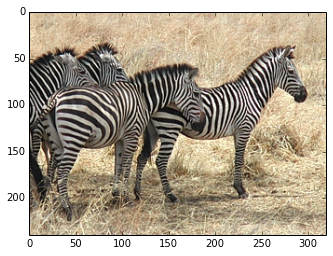

In [16]:
im = caffe.io.load_image('/home/nine/datasets/awa/JPEGImages/zebra/zebra_0001.jpg')

transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_mean('data', np.load('../../python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1))
transformer.set_transpose('data', (2,0,1))
transformer.set_channel_swap('data', (2,1,0))
transformer.set_raw_scale('data', 255.0)


plt.subplot(1,1,1)
plt.imshow(im)

out = net.forward_all(data=np.asarray([transformer.preprocess('data', im)]))
print out


In [17]:
print net.params['fc8_regularized'][2].data.size
print net.params['fc8_regularized'][2].data
#print open('./train_val.prototxt').read()

22
[[[[ 6.74648952]]]


 [[[ 5.68420362]]]


 [[[ 6.62618065]]]


 [[[ 6.5830555 ]]]


 [[[-4.38898802]]]


 [[[-2.88362265]]]


 [[[-3.20215368]]]


 [[[-4.33971357]]]


 [[[ 0.11119828]]]


 [[[ 0.24146804]]]


 [[[ 0.08012918]]]


 [[[ 0.04509341]]]


 [[[ 0.32206446]]]


 [[[ 0.21063022]]]


 [[[ 0.01839979]]]


 [[[ 0.02600946]]]


 [[[ 0.25088242]]]


 [[[ 0.07837021]]]


 [[[ 0.02941511]]]


 [[[ 0.12035673]]]


 [[[ 0.27998367]]]


 [[[ 0.02929972]]]]
